# HW #4 - Unsupervised Learning

## Common Imports

In [ ]:
#Common imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage #hierarchical clustering
from sklearn.decomposition import PCA


## Dataload

In [2]:
import requests
import io
# # Load your dataset
url = 'https://raw.githubusercontent.com/wortcook/UMKC/refs/heads/main/Fall2024/CS5530-0005/hw4/diamonds_casestudy.csv'
s = requests.get(url).content
df = pd.read_csv(io.StringIO(s.decode('utf-8')))
df.head()

,carat,cut,color,clarity,depth,table,price,width,length,height
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## 1. Data Cleaning
Determine missing values

In [3]:
#Check for na data
df.isnull().sum()

carat       0
cut         0
color       0
clarity     0
depth      50
table       0
price       0
width       0
length      0
height      0
dtype: int64

Because there are only 50 missing values, we'll drop them

In [4]:
#drop missing data
df.dropna(inplace=True)
df.isnull().sum()


carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
width      0
length     0
height     0
dtype: int64

## 2. Data Exploration

Take a look at unique values for the categorical columns to get an idea of possible cluster counts.

In [ ]:
df_categories = df.select_dtypes(include=['object'])
print(df_categories.nunique())
print(len(df))

cut        5
color      7
clarity    8
dtype: int64
53890


Drop the columns we are not interested in and pairplot to get a visualization.

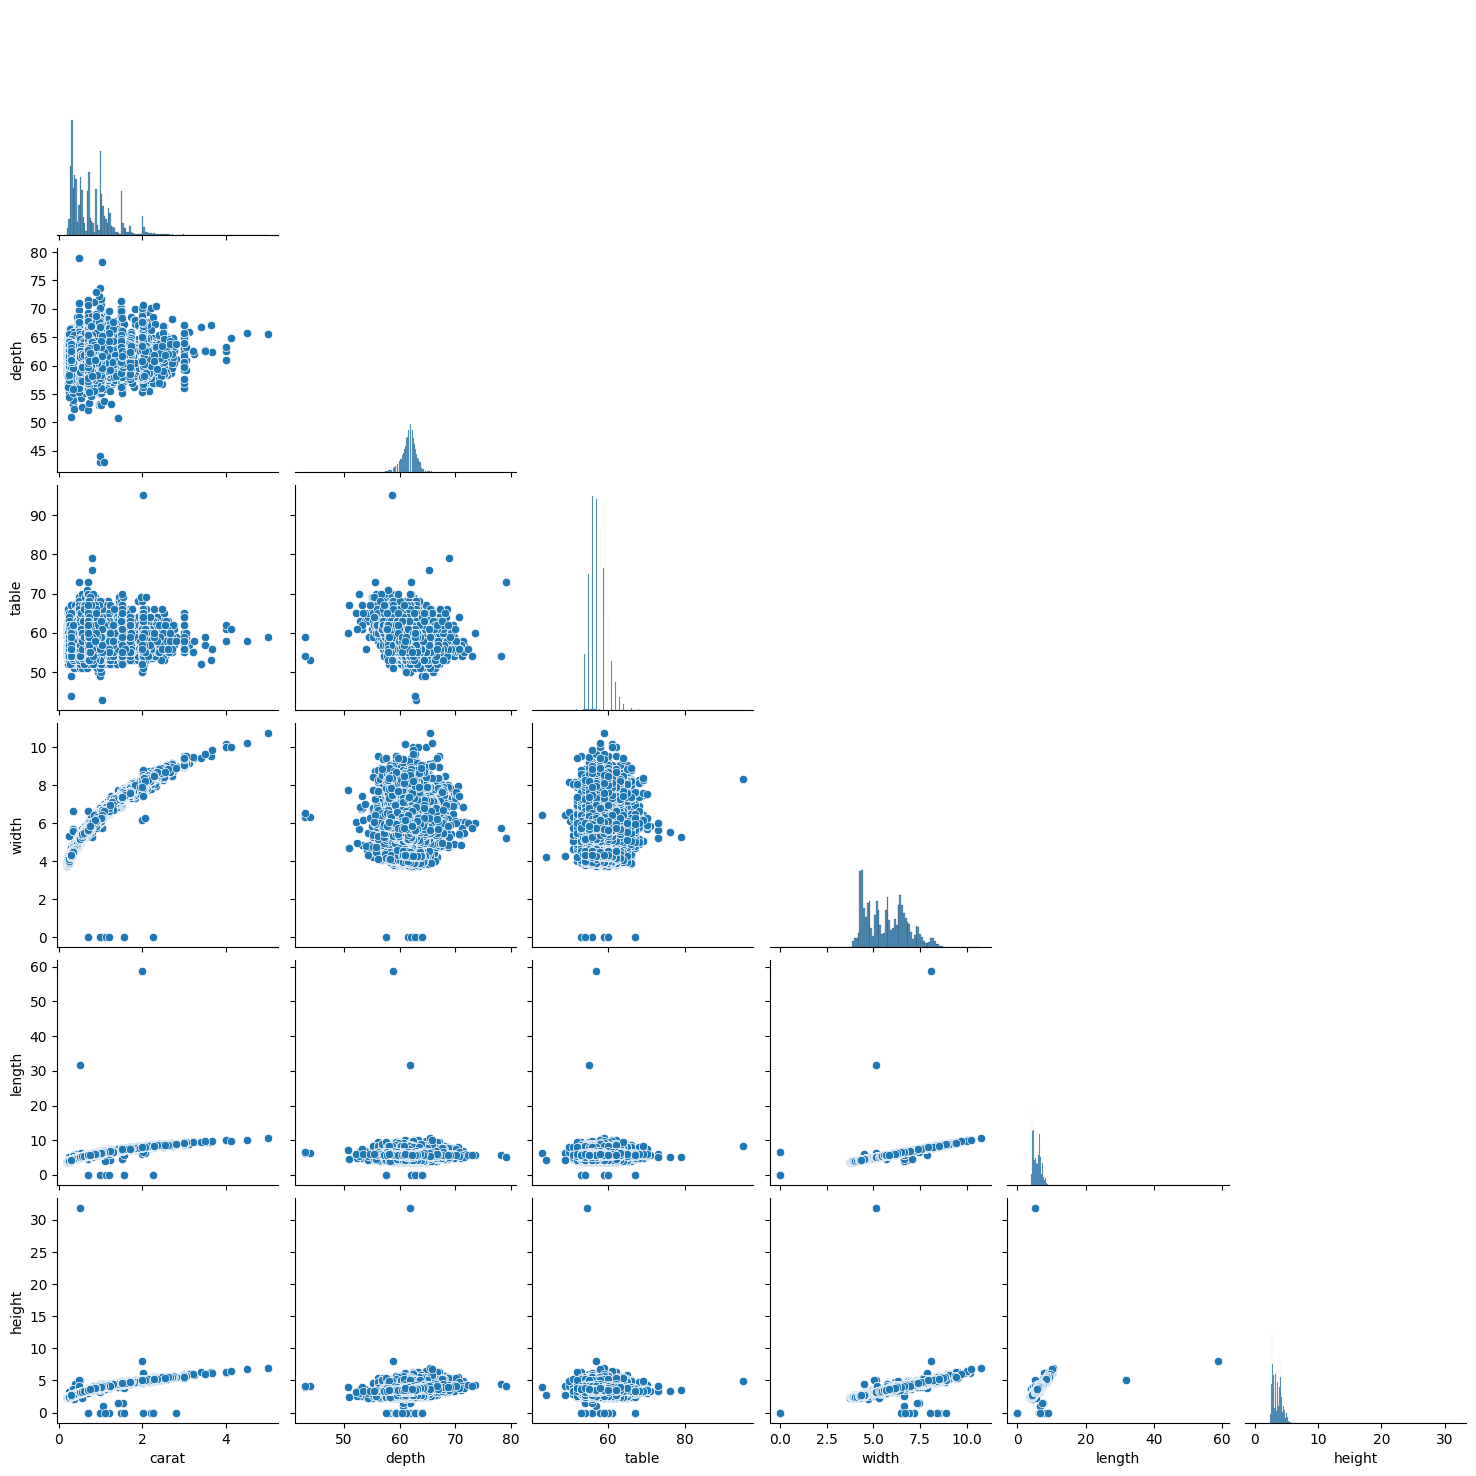

In [6]:

#Get a visualization of the different scatters across the different
#pairs of data
df_to_cluster = df[['carat', 'depth', 'table', 'width', 'length', 'height']]

sns.pairplot(df_to_cluster, corner=True)
plt.show()



Looking at the data above there is are no obvious clusters between the selected features. While there are some trends that can be seen, for example, between carat and length, height, and width, it is not obvious from this dataset how the diamonds might be split into different clusters.

In [7]:
df_to_cluster.head()

,carat,depth,table,width,length,height
0,0.23,61.5,55.0,3.95,3.98,2.43
1,0.21,59.8,61.0,3.89,3.84,2.31
2,0.23,56.9,65.0,4.05,4.07,2.31
3,0.29,62.4,58.0,4.20,4.23,2.63
4,0.31,63.3,58.0,4.34,4.35,2.75


## 3. Unsupervised Learning

In [8]:
#Scale the data
scaler = StandardScaler()

#drop the category columns before we scale as well a price (we don't use price)
df_scaled = scaler.fit_transform(df_to_cluster)
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = df_to_cluster.columns



### KMeans

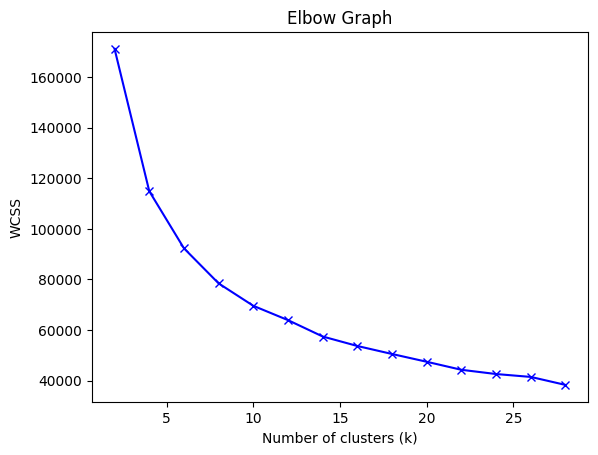

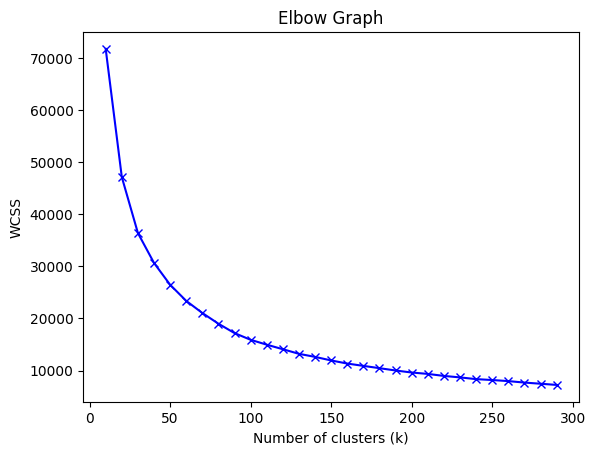

In [ ]:
wcss_list = []
k = range(2, 30, 2)

#Iterate through the different k values and get the WCSS
for i in k:
  model = KMeans(n_clusters=i)
  model.fit(df_scaled)
  wcss_list.append(model.inertia_)

plt.plot(k, wcss_list, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Graph')
plt.show()

#Replot against a larger range of k values
wcss_list = []
k = range(10, 300, 10)

for i in k:
  model = KMeans(n_clusters=i)
  model.fit(df_scaled)
  wcss_list.append(model.inertia_)

plt.plot(k, wcss_list, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Graph')
plt.show()

### Hierarchical

(100, 6)


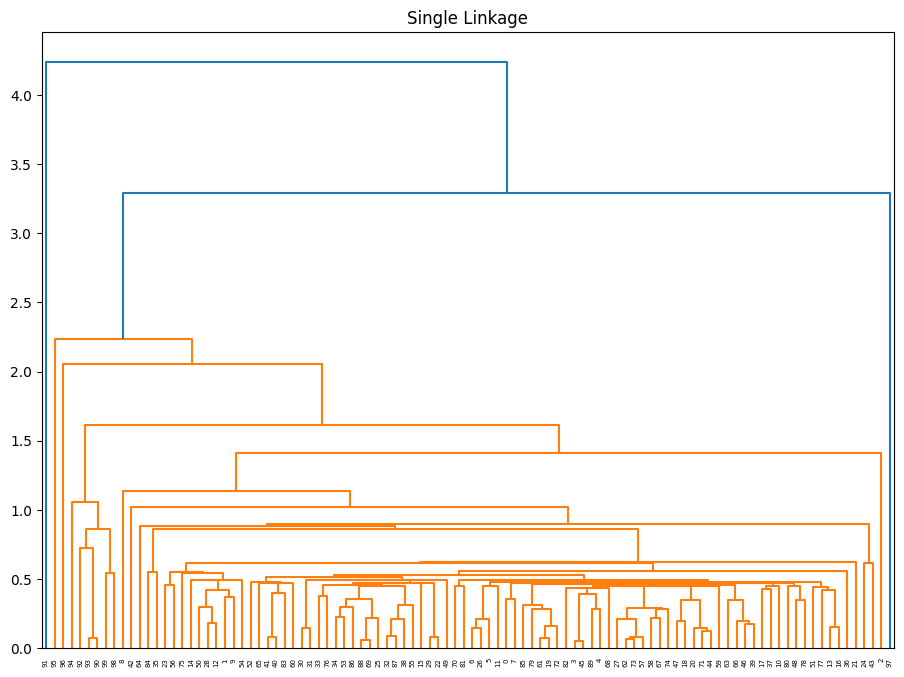

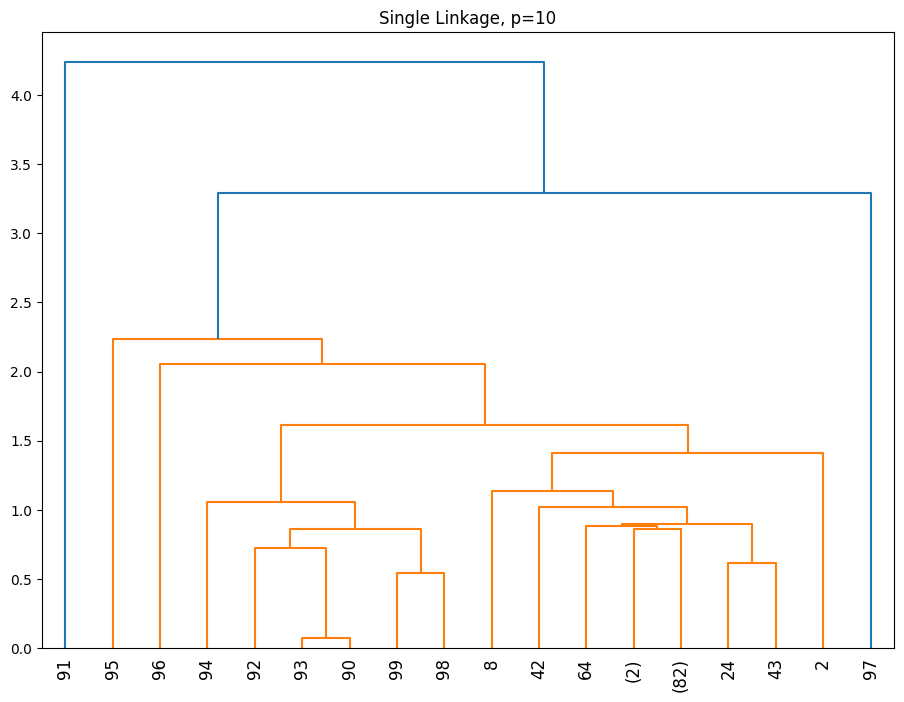

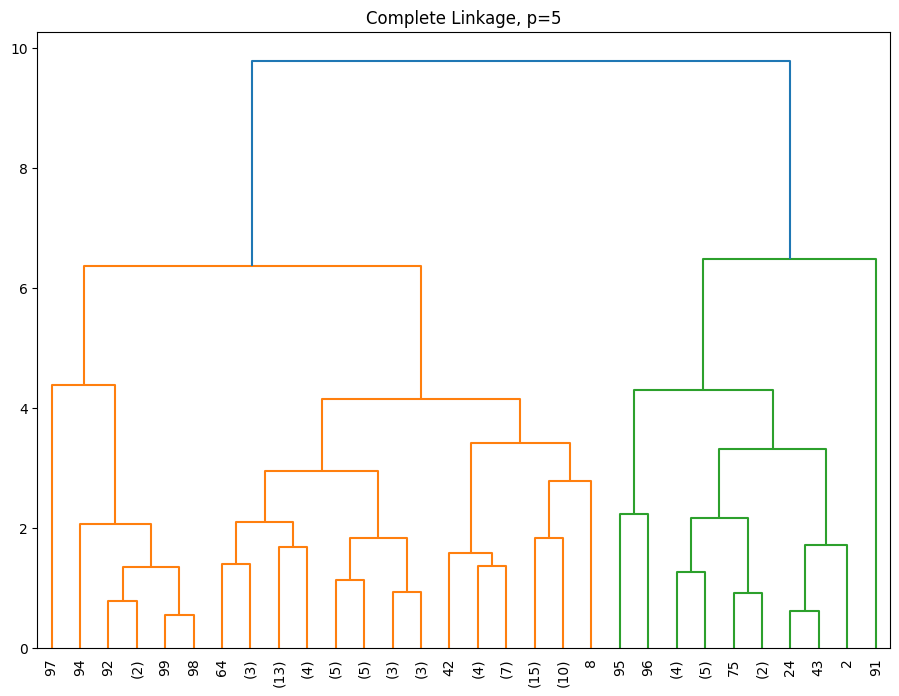

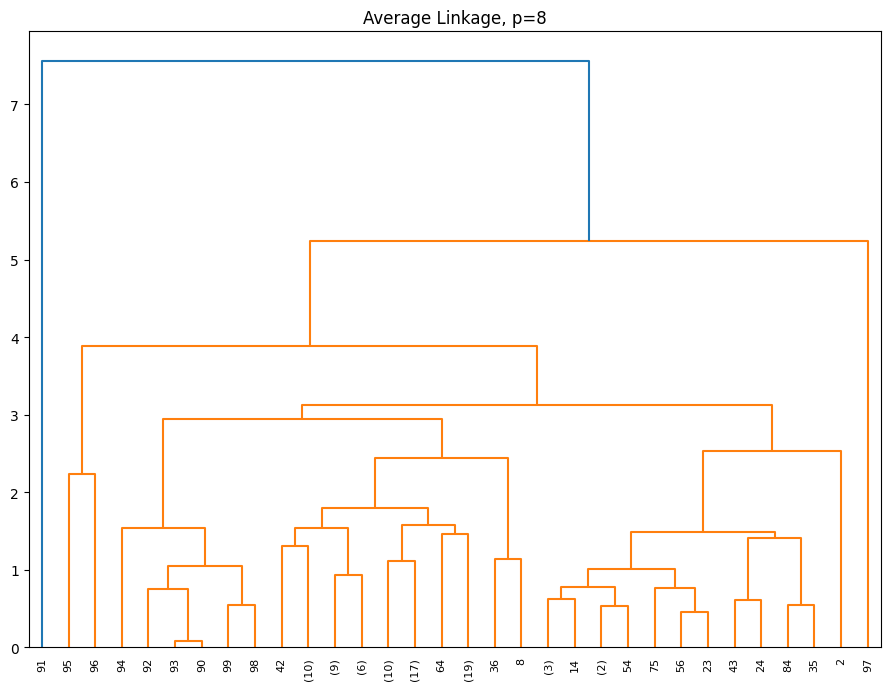

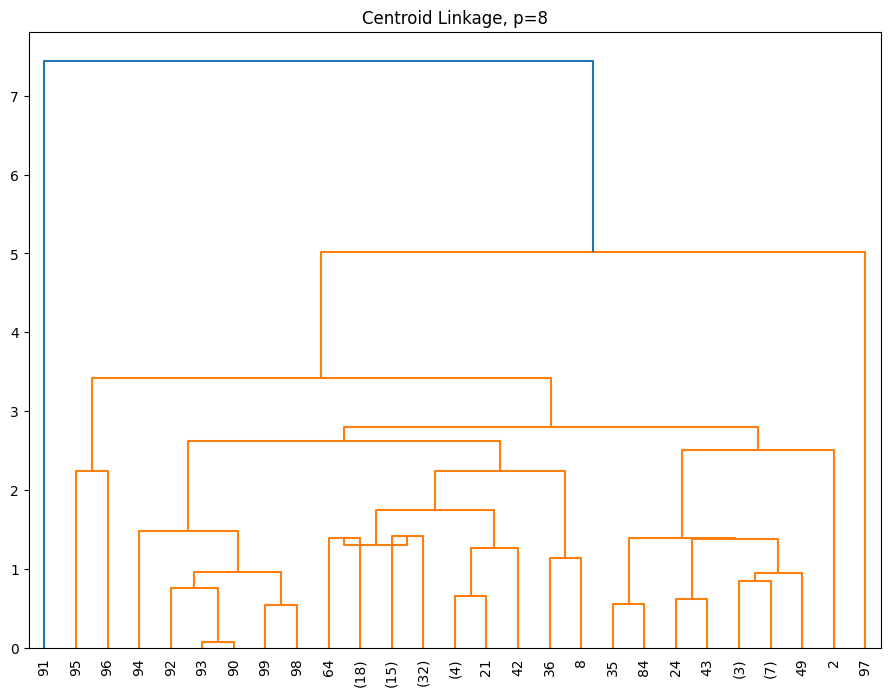

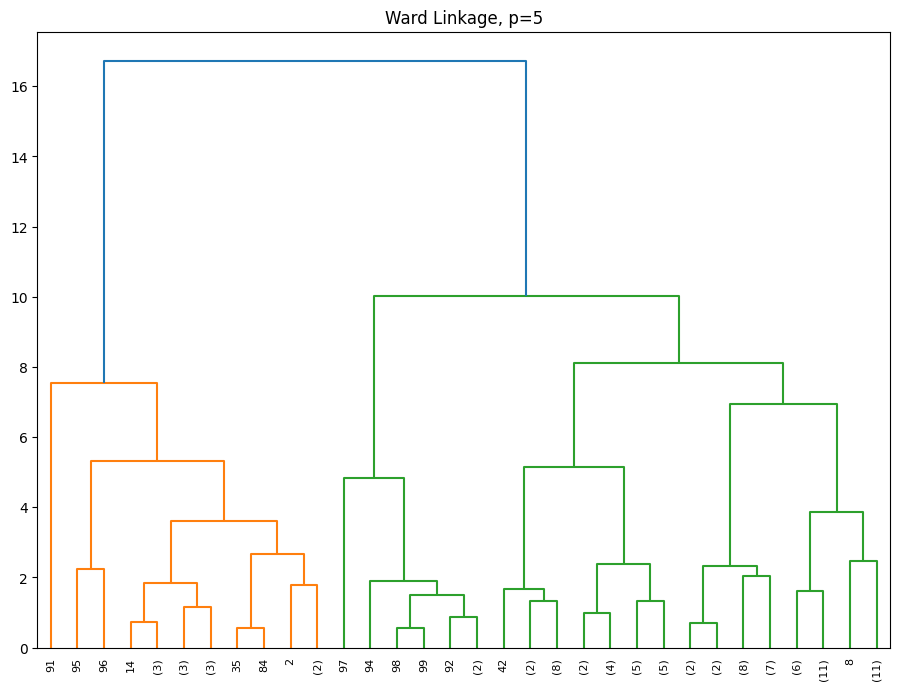

In [ ]:
# Single linkage

#Grab the first 100 rows
df_scaled_1000 = df_scaled.head(100)
df_scaled_1000.columns = ['carat', 'depth', 'table', 'width', 'length', 'height']
print(df_scaled_1000.shape)

#No truncation
plt.figure(figsize=(11, 8))
single_cluster = linkage(df_scaled_1000, method='single', optimal_ordering=True )
dendrogram(single_cluster, leaf_rotation=90)
plt.title('Single Linkage')
plt.show()

#Single linkage with truncation
plt.figure(figsize=(11, 8))
single_cluster = linkage(df_scaled_1000, method='single', optimal_ordering=True)
dendrogram(single_cluster, leaf_rotation=90, truncate_mode='level', p=10)
plt.title('Single Linkage, p=10')
plt.show()

#Complete linkage with truncation
plt.figure(figsize=(11, 8))
complete_cluster = linkage(df_scaled_1000, method='complete', optimal_ordering=True)
dendrogram(complete_cluster, leaf_rotation=90, truncate_mode='level', p=5)
plt.title('Complete Linkage, p=5')
plt.show()

#Average linkage with truncation
plt.figure(figsize=(11, 8))
average_cluster = linkage(df_scaled_1000, method='average', optimal_ordering=True)
dendrogram(average_cluster, leaf_rotation=90, truncate_mode='level', p=8)
plt.title('Average Linkage, p=8')
plt.show()

#Centroid linkage with truncation
plt.figure(figsize=(11, 8))
centroid_cluster = linkage(df_scaled_1000, method='centroid', optimal_ordering=True)
dendrogram(centroid_cluster, leaf_rotation=90, truncate_mode='level', p=8)
plt.title('Centroid Linkage, p=8')
plt.show()

#Ward linkage with truncation
plt.figure(figsize=(11, 8))
ward_cluster = linkage(df_scaled_1000, method='ward')
dendrogram(ward_cluster, leaf_rotation=90, truncate_mode='level', p=5)
plt.title('Ward Linkage, p=5')
plt.show()


In [11]:
#Look at samples 91 and 97 of the data since they make up the ends of each cluster
print(df_scaled_1000.iloc[91])
print(df_scaled_1000.iloc[97])

#print the range of each column
print(df_scaled_1000.describe())



carat     0.131302
depth    -4.641531
table     5.166030
width     0.641189
length    0.521689
height   -0.026247
Name: 91, dtype: float64
carat     0.342347
depth     3.177087
table     2.033148
width     0.480701
length    0.188935
height    0.753256
Name: 97, dtype: float64
            carat       depth       table       width      length      height
count  100.000000  100.000000  100.000000  100.000000  100.000000  100.000000
mean    -1.002638   -0.087884    0.244272   -1.245883   -1.214321   -1.225688
std      0.327743    1.271899    1.141744    0.501415    0.481128    0.486545
min     -1.261590   -4.641531   -1.547289   -1.730467   -1.737532   -1.797843
25%     -1.177172   -0.732222   -0.652180   -1.543231   -1.494535   -1.542733
50%     -1.071650    0.070582    0.242929   -1.342621   -1.299699   -1.308883
75%     -1.029441    0.733769    0.690484   -1.231171   -1.194619   -1.160068
max      0.342347    3.177087    5.166030    0.641189    0.521689    0.753256


### PCA

[0.65534685 0.21406055]


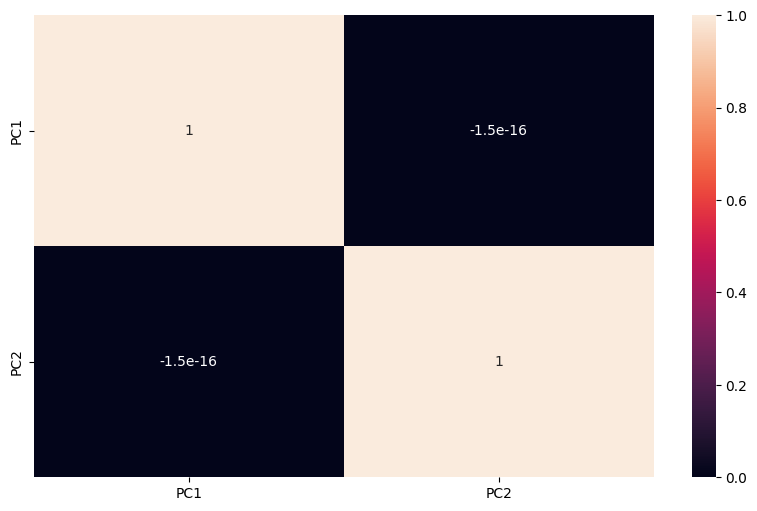

In [12]:
data_PCA = PCA(n_components=2).fit_transform(df_scaled)

#show the variance explained by the PCA
print(PCA(n_components=2).fit(df_scaled).explained_variance_ratio_)

data_PCA = pd.DataFrame(data_PCA, columns=['PC1', 'PC2'])

plt.figure(figsize=(10, 6))
sns.heatmap(data_PCA.corr(), annot=True)
plt.show()



KMeans with PCA

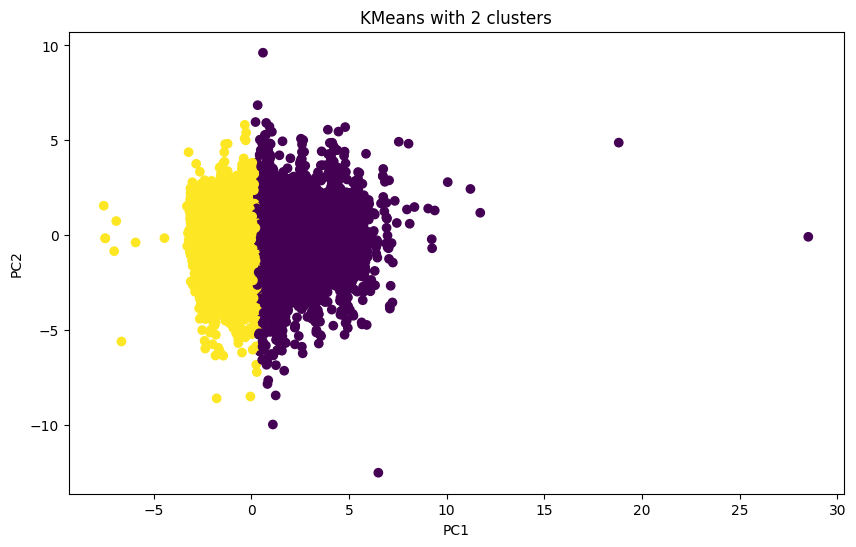

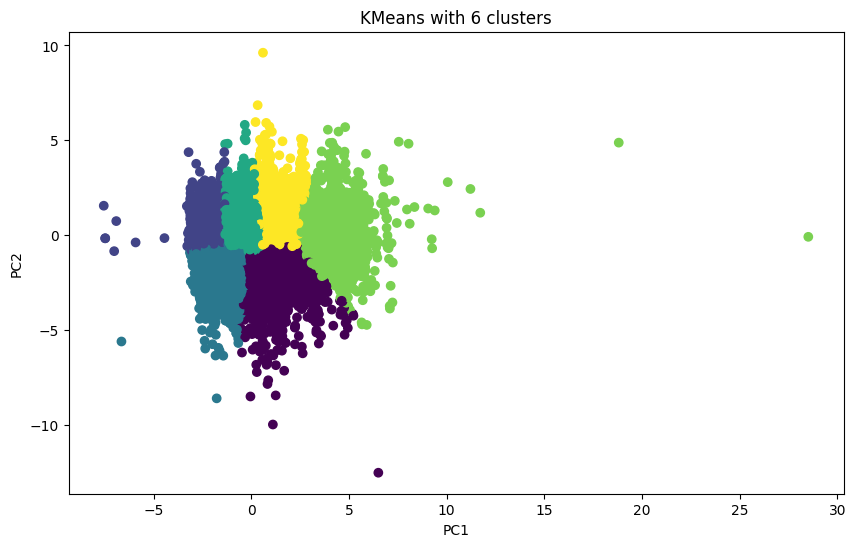

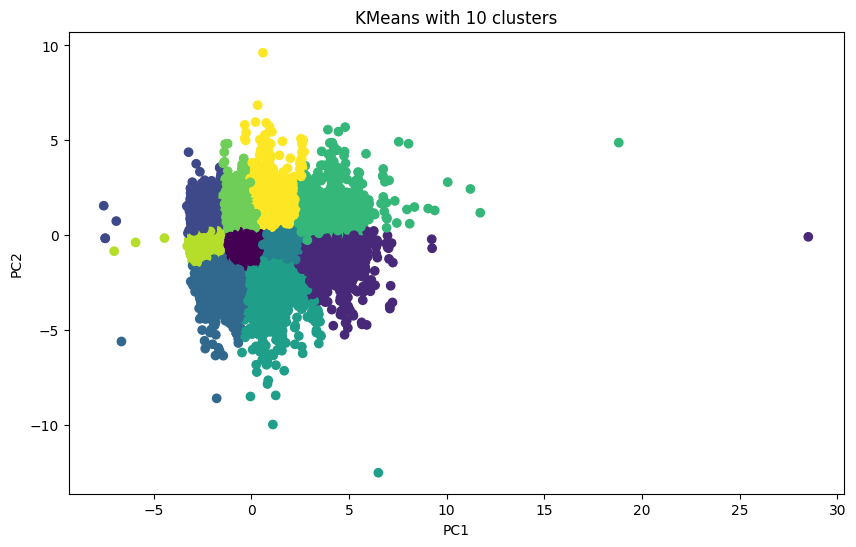

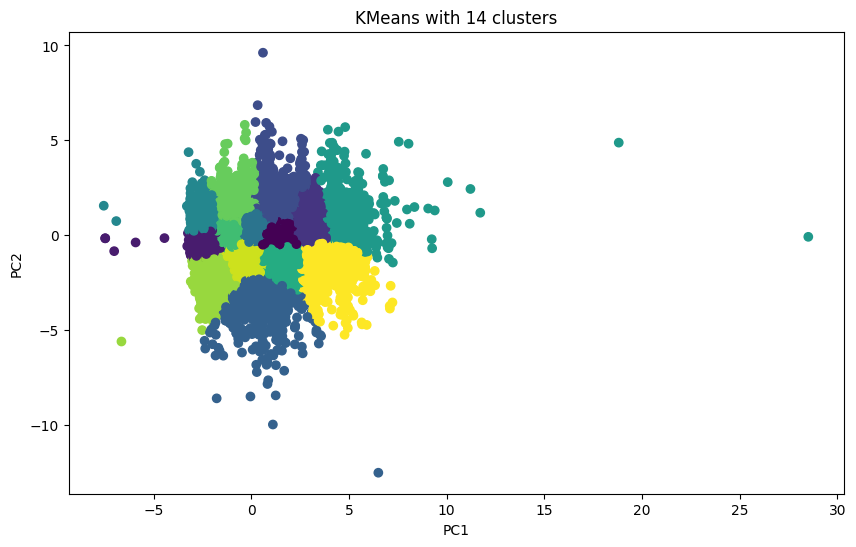

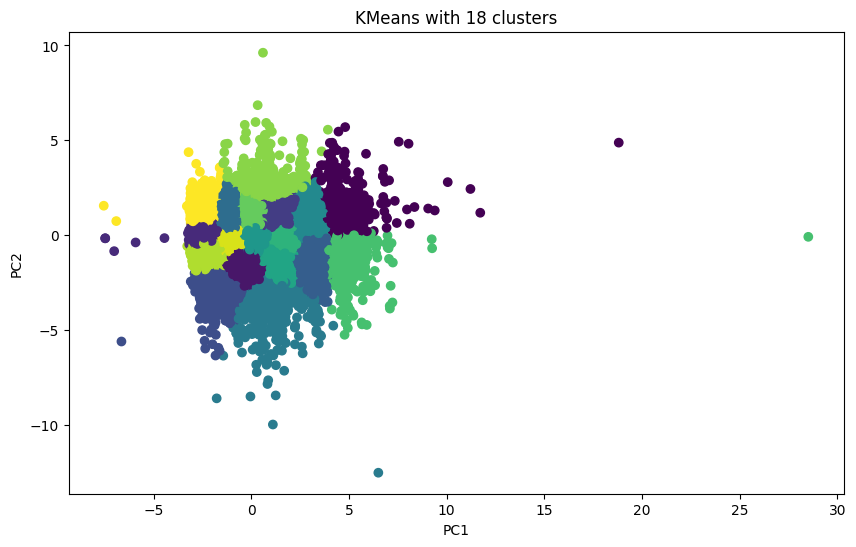

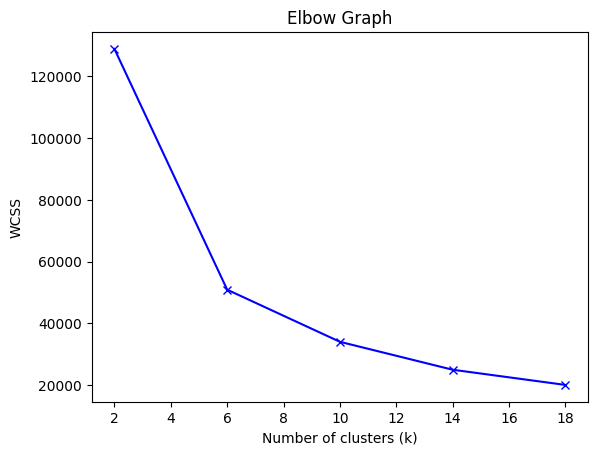

In [13]:

wcss_list = []
k = range(2, 22, 4)

for i in k:
  model = KMeans(n_clusters=i, max_iter=1000)
  model.fit(data_PCA)
  wcss_list.append(model.inertia_)
  
  #now plot the classes
  plt.figure(figsize=(10, 6))
  plt.scatter(data_PCA['PC1'], data_PCA['PC2'], c=model.labels_)
  plt.xlabel('PC1')
  plt.ylabel('PC2')
  plt.title('KMeans with {} clusters'.format(i))
  plt.show()
  

plt.plot(k, wcss_list, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Graph')
plt.show()

Hierarchical with PCA

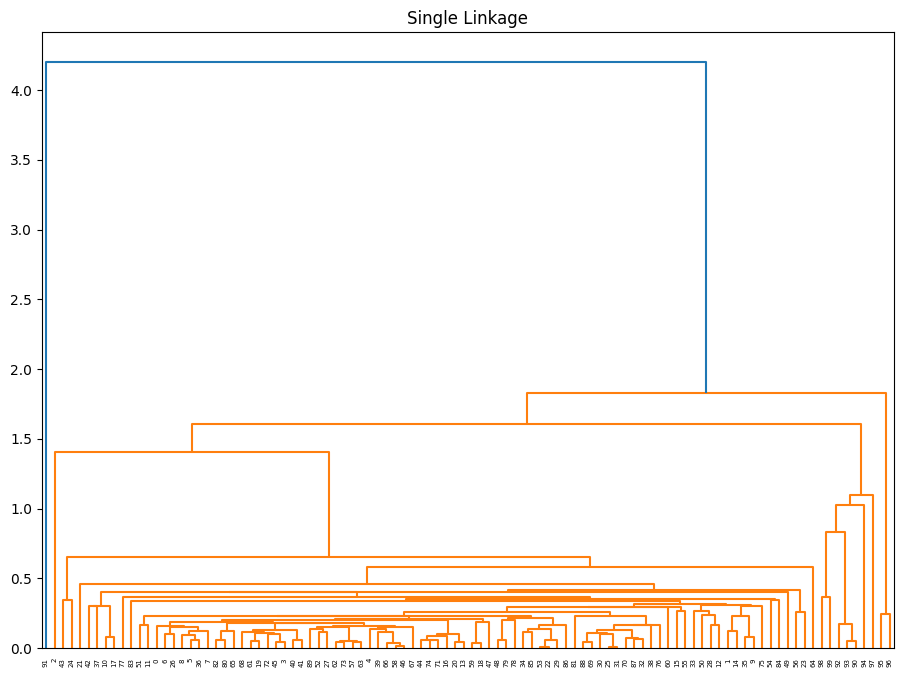

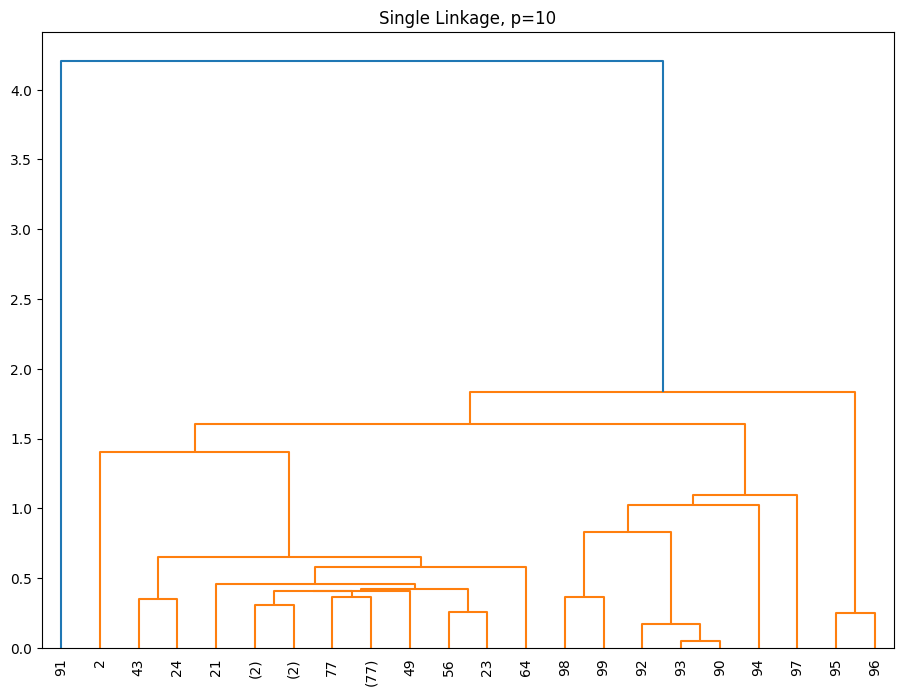

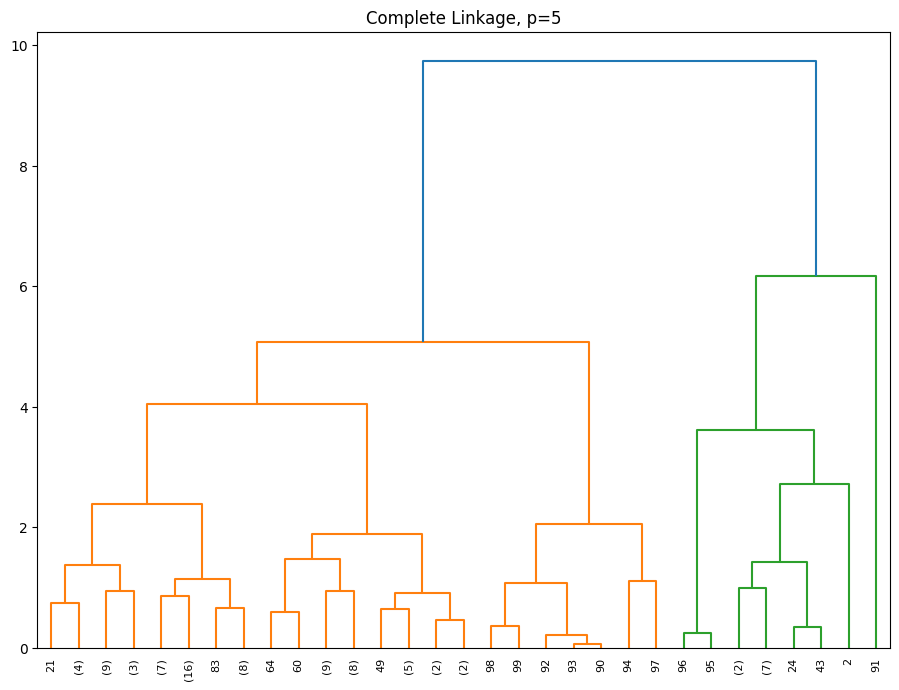

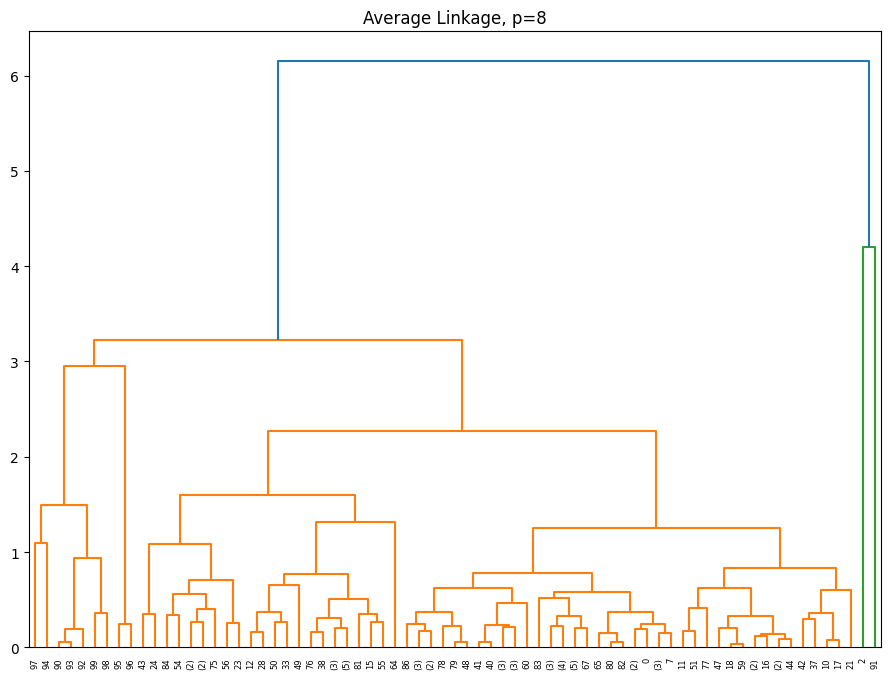

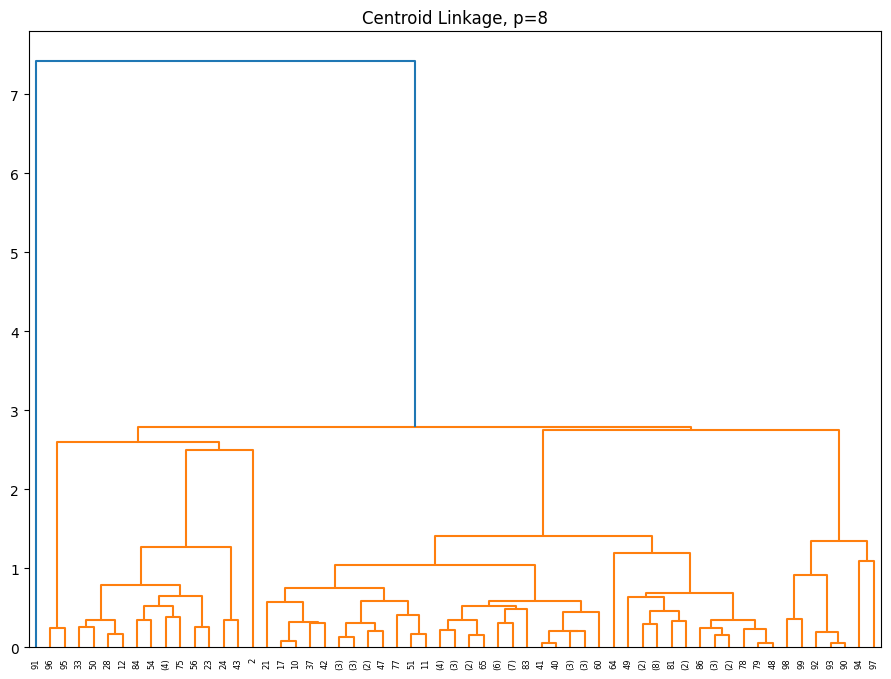

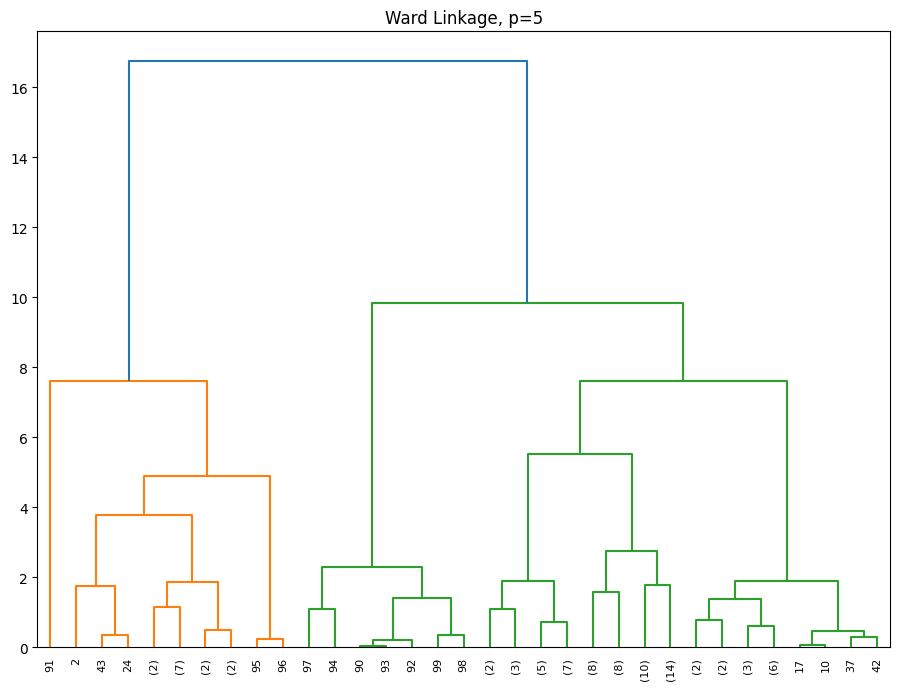

In [14]:
# Single linkage

#Grab the first 100 rows
df_PCA_1000 = data_PCA.head(100)

#Set plot size
plt.figure(figsize=(11, 8))
single_cluster = linkage(df_PCA_1000, method='single', optimal_ordering=True)
dendrogram(single_cluster, leaf_rotation=90)
plt.title('Single Linkage')
plt.show()

plt.figure(figsize=(11, 8))
single_cluster = linkage(df_PCA_1000, method='single', optimal_ordering=True)
dendrogram(single_cluster, leaf_rotation=90, truncate_mode='level', p=10)
plt.title('Single Linkage, p=10')
plt.show()

plt.figure(figsize=(11, 8))
complete_cluster = linkage(df_PCA_1000, method='complete', optimal_ordering=True)
dendrogram(complete_cluster, leaf_rotation=90, truncate_mode='level', p=5)
plt.title('Complete Linkage, p=5')
plt.show()

plt.figure(figsize=(11, 8))
average_cluster = linkage(df_PCA_1000, method='average', optimal_ordering=True)
dendrogram(average_cluster, leaf_rotation=90, truncate_mode='level', p=8)
plt.title('Average Linkage, p=8')
plt.show()

plt.figure(figsize=(11, 8))
centroid_cluster = linkage(df_PCA_1000, method='centroid', optimal_ordering=True)
dendrogram(centroid_cluster, leaf_rotation=90, truncate_mode='level', p=8)
plt.title('Centroid Linkage, p=8')
plt.show()

plt.figure(figsize=(11, 8))
ward_cluster = linkage(df_PCA_1000, method='ward', optimal_ordering=True)
dendrogram(ward_cluster, leaf_rotation=90, truncate_mode='level', p=5)
plt.title('Ward Linkage, p=5')
plt.show()
